In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lecture du fichier CSV
df = pd.read_csv('donnees_plantes.csv')

In [25]:
# Afficher les premières données
df.head()

,id,hauteur_initiale_cm,hauteur_finale_cm,condition_lumiere,condition_arrosage
0,70,14.87,22.74,moyenne,haute
1,140,14.72,18.86,haute,moyenne
2,12,14.70,19.48,basse,basse
3,51,14.70,19.63,moyenne,moyenne
4,35,14.66,13.87,haute,moyenne


In [26]:
# Afficher les dernières données
df.tail()

,id,hauteur_initiale_cm,hauteur_finale_cm,condition_lumiere,condition_arrosage
145,101,5.31,14.42,moyenne,haute
146,99,5.25,24.45,haute,basse
147,11,5.21,15.52,haute,haute
148,129,5.07,20.53,moyenne,moyenne
149,73,5.06,11.41,basse,basse


In [27]:
# Fonction pour nettoyer les données (suppression des valeurs manquantes)
def nettoyer_donnees(dataframe):
    donnees_nettoyees = []
    for i in range(len(dataframe)):
        ligne = dataframe.values[i]
        ligne_nettoyee = True
        for value in ligne:
            if value != value:  # Vérifie si la valeur est NaN
                ligne_nettoyee = False
                break
        if ligne_nettoyee:
            donnees_nettoyees.append(ligne)
    return pd.DataFrame(donnees_nettoyees, columns=dataframe.columns)

# Nettoyage des données
df_nettoye = nettoyer_donnees(df)
df_nettoye

,id,hauteur_initiale_cm,hauteur_finale_cm,condition_lumiere,condition_arrosage
0,70,14.87,22.74,moyenne,haute
1,140,14.72,18.86,haute,moyenne
2,12,14.70,19.48,basse,basse
3,51,14.70,19.63,moyenne,moyenne
4,35,14.66,13.87,haute,moyenne
...,...,...,...,...,...
145,101,5.31,14.42,moyenne,haute
146,99,5.25,24.45,haute,basse
147,11,5.21,15.52,haute,haute
148,129,5.07,20.53,moyenne,moyenne


In [28]:
# Fonction pour calculer la moyenne d'une colonne
def calculer_moyenne(dataframe, colonne):
    total = 0
    compte = 0
    for value in dataframe[colonne]:
        total += value
        compte += 1
    return total / compte if compte != 0 else 0

# Calcul des moyennes
moyenne_hauteur_initiale = calculer_moyenne(df_nettoye, 'hauteur_initiale_cm')
moyenne_hauteur_finale = calculer_moyenne(df_nettoye, 'hauteur_finale_cm')

print(f"Moyenne de la hauteur initiale : {round(moyenne_hauteur_initiale,2)} cm")
print(f"Moyenne de la hauteur finale : {round(moyenne_hauteur_finale,2)} cm")

Moyenne de la hauteur initiale : 9.73 cm
Moyenne de la hauteur finale : 17.76 cm


In [29]:
# Analyses statistiques
df_nettoye.describe()

,id,hauteur_initiale_cm,hauteur_finale_cm
count,150.000000,150.000000,150.000000
mean,75.500000,9.729000,17.762600
std,43.445368,2.965321,4.371158
min,1.000000,5.060000,10.080000
25%,38.250000,7.145000,13.712500
50%,75.500000,9.480000,18.340000
75%,112.750000,12.500000,21.365000
max,150.000000,14.870000,24.850000


In [30]:
# Fonction pour calculer la corrélation entre deux colonnes
def calculer_correlation(dataframe, colonne1, colonne2):
    moyenne1 = calculer_moyenne(dataframe, colonne1)
    moyenne2 = calculer_moyenne(dataframe, colonne2)
    numerateur = 0
    denominateur1 = 0
    denominateur2 = 0
    for i in range(len(dataframe)):
        x = dataframe[colonne1].values[i]
        y = dataframe[colonne2].values[i]
        numerateur += (x - moyenne1) * (y - moyenne2)
        denominateur1 += (x - moyenne1) ** 2
        denominateur2 += (y - moyenne2) ** 2
    denominator = (denominateur1 * denominateur2) ** 0.5
    return numerateur / denominator if denominator != 0 else 0

# Calcul de la corrélation
correlation = calculer_correlation(df_nettoye, 'hauteur_initiale_cm', 'hauteur_finale_cm')
print(f"Corrélation entre la hauteur initiale et finale : {correlation}")

Corrélation entre la hauteur initiale et finale : 0.03549493054496245


In [31]:
# Fonction pour la régression linéaire
def regression_lineaire(dataframe, x_col, y_col):
    x_moyen = calculer_moyenne(dataframe, x_col)
    y_moyen = calculer_moyenne(dataframe, y_col)
    numerateur = 0
    denominateur = 0
    for i in range(len(dataframe)):
        x = dataframe[x_col].values[i]
        y = dataframe[y_col].values[i]
        numerateur += (x - x_moyen) * (y - y_moyen)
        denominateur += (x - x_moyen) ** 2
    pente = numerateur / denominateur if denominateur != 0 else 0
    intercept = y_moyen - pente * x_moyen
    return pente, intercept

# Calcul de la régression linéaire
pente, intercept = regression_lineaire(df_nettoye, 'hauteur_initiale_cm', 'hauteur_finale_cm')
print(f"Équation de la régression linéaire : y = {pente}x + {intercept}")

Équation de la régression linéaire : y = 0.05232282004914228x + 17.253551283741892


### Expliquer le résultat du coefficient de corrélation

La valeur de corrélation de 0.035 entre la hauteur initiale et finale d’une plante indique une très faible relation linéaire entre ces deux variables. En d’autres termes, la hauteur initiale de la plante n’a presque aucun impact sur sa hauteur finale. Une corrélation proche de 0 signifie qu’il n’y a pas de tendance claire montrant que les plantes plus grandes au départ deviendront proportionnellement plus grandes à la fin de la période d’observation. Cela pourrait suggérer que d’autres facteurs, tels que les conditions de croissance, les nutriments, ou la lumière, jouent un rôle plus important dans la détermination de la hauteur finale des plantes.

Ref: l'IA

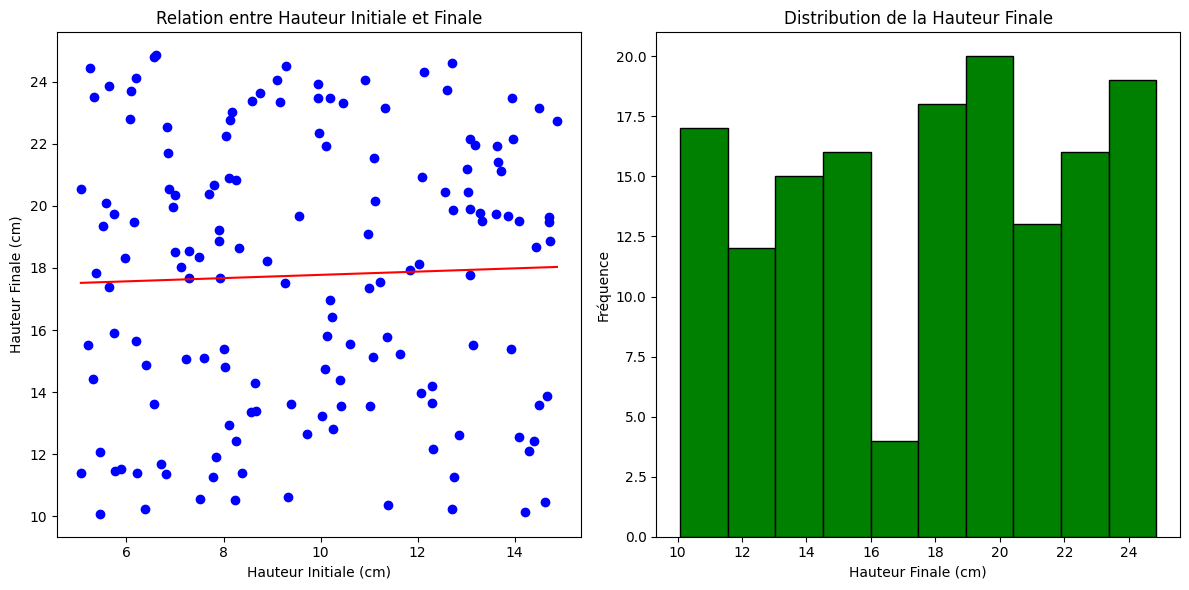

In [32]:
# Création des graphiques
plt.figure(figsize=(12, 6))

# Graphique en nuage de points
plt.subplot(1, 2, 1)
plt.scatter(df_nettoye['hauteur_initiale_cm'], df_nettoye['hauteur_finale_cm'], color='blue')
plt.plot(df_nettoye['hauteur_initiale_cm'], pente * df_nettoye['hauteur_initiale_cm'] + intercept, color='red')
plt.xlabel('Hauteur Initiale (cm)')
plt.ylabel('Hauteur Finale (cm)')
plt.title('Relation entre Hauteur Initiale et Finale')

# Histogramme de la hauteur finale
plt.subplot(1, 2, 2)
plt.hist(df_nettoye['hauteur_finale_cm'], bins=10, color='green', edgecolor='black')
plt.xlabel('Hauteur Finale (cm)')
plt.ylabel('Fréquence')
plt.title('Distribution de la Hauteur Finale')

plt.tight_layout()
plt.show()